<a href="https://colab.research.google.com/github/woraphonp-038-5/Project-Big-Data/blob/main/%E0%B8%AA%E0%B8%B3%E0%B9%80%E0%B8%99%E0%B8%B2%E0%B8%82%E0%B8%AD%E0%B8%87_ThaiBaan_Data_Analytics_and_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Project 2: Data Analytics and Modeling

<img src="https://datarundown.com/wp-content/uploads/2023/05/Model-Data-Analytics.jpg" width="400px">

ชื่อกลุ่ม: ...

รายชื่อสมาชิก การแบ่งงาน และสัดส่วนในการทำงาน:
1. ...
2. ...
3. ...
4. ...

กำหนดส่ง: ศุกร์ 24 ตุลาคม 2568  

รายงานในชั้นเรียน: เสาร์ 25 ตุลาคม 2568

** NOTE **
* อย่าลืมบันทึกงานที่ทำในโน้ตบุ๊คนี้เป็นประจำขณะทำงาน มิเช่นนั้นงานที่ทำอยู่อาจสูญหายได้
* **เริ่มทำแต่เนิ่น ๆ อย่ารอที่จะทำก่อนส่ง เพราะจะทำไม่เสร็จ เนื่องจากปัญหามากมายที่จะเกิดขึ้นระหว่างการทำงาน และอาจารย์ไม่รับปรึกษาในคืนก่อนส่ง**
----------------------

### เลือกชุดข้อมูล 1 ชุดจากข้อมูลที่กำหนดให้ต่อไปนี้
* <b>MovieLens 1M Data Set<b>
    * ข้อมูลชุดนี้มีข้อมูลเกี่ยวกับ movies, users, และ how they rate the movies
    * สามารถดูรายละเอียดได้ที่ http://grouplens.org/datasets/movielens/
    * Download the 1 million ratings data set from https://grouplens.org/datasets/movielens/1m/
    * Merge all of the data into a single Pandas DataFrame. See
        * https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html
    
* <b>Walmart_Sales_Forecast<b>
    * สามารถดูรายละเอียดได้ที่ https://github.com/Asikpalysik/Walmart_Sales_Forecast/tree/main
    * ข้อมูลประกอบด้วยไฟล์ features.csv, stores.csv และ ข้อมูลยอดขาย (train.csv และ test.csv)
    * ให้ใช้ข้อมูลจากทุกไฟล์ทุกอย่างประกอบกันในการวิเคราะห์
    
* <b>NYC Taxi Trips<b>
    * ข้อมูลทริปของแท็กซี่ในเมืองนิวยอร์กจาก https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page
    * ข้อมูลเก็บโดย The NYC Taxi and Limousine Commission (TLC) ประกอบด้วย pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts
    * นอกจากไฟล์ข้อมูลทริปของแท็กซี่แล้ว ยังมีข้อมูลเกี่ยวกับ zone ของพื้นที่ที่ให้บริการ และคำอธิบายข้อมูลในส่วนล่างสุดของหน้าเดียวกัน
    * ให้ศึกษาข้อมูลการเดินทางของแท็กซี่เหลืองหรือแท็กซี่เขียวในช่วงหนึ่ง (เช่น 1 เดือน หรือ 1 ปีที่ผ่านมา เป็นต้น)
    * ตัวอย่างการอ่านไฟล์ parquet
    ```python
    # install this module to read .parquet files
    !pip install pyarrow
    import pyarrow.parquet as pq
    trips = pq.read_table('yellow_tripdata_2023-09.parquet')
    trips = trips.to_pandas()
    trips
    ```
    
----------------------------------

### ศึกษาข้อมูลที่เลือกใช้ แล้วทำการ
* Tell story about data อธิบายลักษณะของข้อมูล ทำความเข้าใจเกี่ยวกับข้อมูลชุดนี้ ด้วยสถิติ และนำเสนอด้วยแผนภาพ แผนภูมิ หรือกราฟต่าง ๆ
* ตั้ง<span style="color:red">*ปัญหาหรือคำถามเชิงองค์กรหรือธุรกิจ*</span>ที่กลุ่มท่านสนใจเกี่ยวกับข้อมูลนี้ แล้วทำการคาดการณ์ (conjectures) เกี่ยวกับ<span style="color:red">*ปัญหาหรือคำถาม*</span>ที่ได้ตั้งไว้อย่างน้อย 3 ข้อ แล้วสนับสนุนหรือปฏิเสธข้อคาดการณ์ด้วยการวิเคราะห์ข้อมูลหรือด้วย data visualization
    * ปัญหาที่สนใจมีความสำคัญอย่างไร?
    * ข้อคาดการณ์ของท่านจะนำไปสู่การแก้ไขปัญหาหรือตอบคำถามอย่างไร?
* สร้างตัวแบบทำนายโดยใช้ข้อมูลที่เลือกในการตอบปัญหาหรือคำถาม
    * prepare data
    * feature engineering
    * partition data (consider class if any)
    * handle imbalance data
    * build model
      * hyperparameter tuning
    * test model

## Data Loading

In [119]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [120]:
import pandas as pd

# Load data
movies = '/content/drive/MyDrive/DW part2/Thaibann/movies.dat'
ratings = '/content/drive/MyDrive/DW part2/Thaibann/ratings.dat'
users = '/content/drive/MyDrive/DW part2/Thaibann/users.dat'


# Load data into pandas DataFrames, skipping the header row
movies_df = pd.read_csv(movies, sep='::', engine='python', encoding='latin-1', names=['MovieID', 'Title', 'Genres'], skiprows=1)
ratings_df = pd.read_csv(ratings, sep='::', engine='python' , encoding='latin-1', names=['UserID', 'MovieID', 'Rating', 'Timestamp'], skiprows=1)
users_df = pd.read_csv(users, sep='::', engine='python', encoding='latin-1', names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'], skiprows=1)

In [121]:
movies_df.head()

,MovieID,Title,Genres
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [122]:
ratings_df.head()

,UserID,MovieID,Rating,Timestamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [123]:
users_df.head()

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


## Data Preparation

In [124]:
# Explore variables and check data quality

# Handle missing values, outliers, and noises

# Perform feature engineering (optional)

In [125]:
# Merge data
# Convert UserID and MovieID columns to string type for merging
ratings_df['UserID'] = ratings_df['UserID'].astype(str)
users_df['UserID'] = users_df['UserID'].astype(str)
movies_df['MovieID'] = movies_df['MovieID'].astype(str)
ratings_df['MovieID'] = ratings_df['MovieID'].astype(str)


# Merge ratings and users DataFrames
merged_df = pd.merge(ratings_df, users_df, on='UserID')

# Merge the result with the movies DataFrame
merged_df = pd.merge(merged_df, movies_df, on='MovieID')

In [126]:
# Date Time
merged_df['Datetime'] = pd.to_datetime(merged_df['Timestamp'], unit='s')

In [127]:
# แยกคอลัมน์ Genres ด้วยตัวคั่น '|'
# โดยจำกัดจำนวนคอลัมน์สูงสุดเป็น 3 (สามารถเพิ่มหรือลดตามความเหมาะสม)
split_genres = merged_df['Genres'].str.split('|', expand=True)

# ตั้งชื่อคอลัมน์ใหม่ Genre1, Genre2, Genre3 โดยใช้ iloc เพื่อเลือกคอลัมน์ที่ต้องการ
merged_df['Genre1'] = split_genres.iloc[:, 0]
merged_df['Genre2'] = split_genres.iloc[:, 1]
merged_df['Genre3'] = split_genres.iloc[:, 2]

# ลบคอลัมน์ Genres ออก
merged_df = merged_df.drop(columns=['Genres'])

In [128]:
merged_df['DayOfWeek'] = merged_df['Datetime'].dt.dayofweek  # Monday=0, Sunday=6
merged_df['Month'] = merged_df['Datetime'].dt.month
merged_df['Year'] = merged_df['Datetime'].dt.year
merged_df['Hour'] = merged_df['Datetime'].dt.time

In [129]:
# ฟังก์ชันเพื่อแปลง Genre เป็นตัวเลข
def genre_to_number(genre):
    # ถ้า genre เป็น None หรือค่าว่าง ให้คืนค่า 0
    if genre is None or genre == '':
        return 0

    # Check if genre is of type int or float before proceeding
    if isinstance(genre, (int, float)):
        return genre  # Return the value as is if it's already numeric

    genre_dict = {
        "Action": 1,
        "Adventure": 2,
        "Animation": 3,
        "Children's": 4,
        "Comedy": 5,
        "Crime": 6,
        "Documentary": 7,
        "Drama": 8,
        "Fantasy": 9,
        "Film-Noir": 10,
        "Horror": 11,
        "Musical": 12,
        "Mystery": 13,
        "Romance": 14,
        "Sci-Fi": 15,
        "Thriller": 16,
        "War": 17,
        "Western": 18,
    }

    # Strip any leading/trailing whitespace and return corresponding value or 0 if not found
    return genre_dict.get(genre.strip(), 0)  # Return 0 for unknown genres

# ใช้ apply เพื่อแปลง Genre1, Genre2, Genre3
merged_df['Genre1'] = merged_df['Genre1'].apply(genre_to_number)
merged_df['Genre2'] = merged_df['Genre2'].apply(genre_to_number)
merged_df['Genre3'] = merged_df['Genre3'].apply(genre_to_number)

In [130]:
merged_df.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Datetime,Genre1,Genre2,Genre3,DayOfWeek,Month,Year,Hour
0,2,1357,5,978298709,M,56,16,70072,Shine (1996),2000-12-31 21:38:29,8,14,0,6,12,2000,21:38:29
1,2,3068,4,978299000,M,56,16,70072,"Verdict, The (1982)",2000-12-31 21:43:20,8,0,0,6,12,2000,21:43:20
2,2,1537,4,978299620,M,56,16,70072,Shall We Dance? (Shall We Dansu?) (1996),2000-12-31 21:53:40,5,0,0,6,12,2000,21:53:40
3,2,647,3,978299351,M,56,16,70072,Courage Under Fire (1996),2000-12-31 21:49:11,8,17,0,6,12,2000,21:49:11
4,2,2194,4,978299297,M,56,16,70072,"Untouchables, The (1987)",2000-12-31 21:48:17,1,6,8,6,12,2000,21:48:17


In [131]:
# คำนวณค่าเฉลี่ยการให้คะแนน (avg_rating) และจำนวนผู้ใช้ที่ให้คะแนน (votes) ต่อเรื่อง
movie_stats = (
    merged_df.groupby(['Title', 'Year', 'Genre1', 'Genre2', 'Genre3'])
    .agg(avg_rating=('Rating', 'mean'), votes=('UserID', 'nunique'))
    .reset_index()
)

# แสดงผลลัพธ์
movie_stats

,Title,Year,Genre1,Genre2,Genre3,avg_rating,votes
0,"$1,000,000 Duck (1971)",2000,4,5,0,3.172414,29
1,"$1,000,000 Duck (1971)",2001,4,5,0,2.750000,4
2,"$1,000,000 Duck (1971)",2002,4,5,0,2.250000,4
3,'Night Mother (1986),2000,8,0,0,3.428571,63
4,'Night Mother (1986),2001,8,0,0,2.800000,5
...,...,...,...,...,...,...,...
11530,Zeus and Roxanne (1997),2002,4,0,0,3.000000,1
11531,eXistenZ (1999),2000,1,15,16,3.265537,354
11532,eXistenZ (1999),2001,1,15,16,3.232558,43
11533,eXistenZ (1999),2002,1,15,16,2.916667,12


In [132]:
merged_df = pd.merge(merged_df, movie_stats[['Title', 'Year', 'avg_rating', 'votes']],
                      on=['Title', 'Year'],
                      how='left')

In [133]:
merged_df.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Datetime,Genre1,Genre2,Genre3,DayOfWeek,Month,Year,Hour,avg_rating,votes
0,2,1357,5,978298709,M,56,16,70072,Shine (1996),2000-12-31 21:38:29,8,14,0,6,12,2000,21:38:29,3.807540,504
1,2,3068,4,978299000,M,56,16,70072,"Verdict, The (1982)",2000-12-31 21:43:20,8,0,0,6,12,2000,21:43:20,3.854167,336
2,2,1537,4,978299620,M,56,16,70072,Shall We Dance? (Shall We Dansu?) (1996),2000-12-31 21:53:40,5,0,0,6,12,2000,21:53:40,4.136646,322
3,2,647,3,978299351,M,56,16,70072,Courage Under Fire (1996),2000-12-31 21:49:11,8,17,0,6,12,2000,21:49:11,3.565217,368
4,2,2194,4,978299297,M,56,16,70072,"Untouchables, The (1987)",2000-12-31 21:48:17,1,6,8,6,12,2000,21:48:17,3.999022,1023


In [134]:
merged_df['Gender'] = merged_df['Gender'].map({'M': 0, 'F': 1})
merged_df.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Datetime,Genre1,Genre2,Genre3,DayOfWeek,Month,Year,Hour,avg_rating,votes
0,2,1357,5,978298709,0,56,16,70072,Shine (1996),2000-12-31 21:38:29,8,14,0,6,12,2000,21:38:29,3.807540,504
1,2,3068,4,978299000,0,56,16,70072,"Verdict, The (1982)",2000-12-31 21:43:20,8,0,0,6,12,2000,21:43:20,3.854167,336
2,2,1537,4,978299620,0,56,16,70072,Shall We Dance? (Shall We Dansu?) (1996),2000-12-31 21:53:40,5,0,0,6,12,2000,21:53:40,4.136646,322
3,2,647,3,978299351,0,56,16,70072,Courage Under Fire (1996),2000-12-31 21:49:11,8,17,0,6,12,2000,21:49:11,3.565217,368
4,2,2194,4,978299297,0,56,16,70072,"Untouchables, The (1987)",2000-12-31 21:48:17,1,6,8,6,12,2000,21:48:17,3.999022,1023


In [135]:
df_zip = pd.read_csv('/content/drive/MyDrive/DW part2/Thaibann/georef-united-states-of-america-zc-point.csv', sep=';')
df_zip.head()

,Zip Code,Official USPS city name,Official USPS State Code,Official State Name,ZCTA,ZCTA parent,Population,Density,Primary Official County Code,Primary Official County Name,County Weights,Official County Name,Official County Code,Imprecise,Military,Timezone,Geo Point
0,75010,Carrollton,TX,Texas,True,NaN,30406.0,1452.9,48121,Denton,"{""48121"": ""100""}",Denton,48121,False,False,America/Chicago,"33.03425, -96.89673"
1,14783,Steamburg,NY,New York,True,NaN,305.0,4.7,36009,Cattaraugus,"{""36009"": ""100""}",Cattaraugus,36009,False,False,America/New_York,"42.07798, -78.88412"
2,15675,Penn,PA,Pennsylvania,True,NaN,895.0,373.3,42129,Westmoreland,"{""42129"": ""100""}",Westmoreland,42129,False,False,America/New_York,"40.33531, -79.63708"
3,31057,Marshallville,GA,Georgia,True,NaN,2006.0,8.9,13193,Macon,"{""13193"": ""100""}",Macon,13193,False,False,America/New_York,"32.43286, -83.93537"
4,32202,Jacksonville,FL,Florida,True,NaN,6523.0,1268.6,12031,Duval,"{""12031"": ""100""}",Duval,12031,False,False,America/New_York,"30.32503, -81.64802"


In [136]:
# Rename columns in df_zip
df_zip.rename(columns={'Zip Code': 'Zip-code', 'Official USPS city name': 'city','Official State Name': 'state','Primary Official County Name' :'country'} ,inplace=True)

# Display the updated DataFrame to verify the changes
df_zip.head()

,Zip-code,city,Official USPS State Code,state,ZCTA,ZCTA parent,Population,Density,Primary Official County Code,country,County Weights,Official County Name,Official County Code,Imprecise,Military,Timezone,Geo Point
0,75010,Carrollton,TX,Texas,True,NaN,30406.0,1452.9,48121,Denton,"{""48121"": ""100""}",Denton,48121,False,False,America/Chicago,"33.03425, -96.89673"
1,14783,Steamburg,NY,New York,True,NaN,305.0,4.7,36009,Cattaraugus,"{""36009"": ""100""}",Cattaraugus,36009,False,False,America/New_York,"42.07798, -78.88412"
2,15675,Penn,PA,Pennsylvania,True,NaN,895.0,373.3,42129,Westmoreland,"{""42129"": ""100""}",Westmoreland,42129,False,False,America/New_York,"40.33531, -79.63708"
3,31057,Marshallville,GA,Georgia,True,NaN,2006.0,8.9,13193,Macon,"{""13193"": ""100""}",Macon,13193,False,False,America/New_York,"32.43286, -83.93537"
4,32202,Jacksonville,FL,Florida,True,NaN,6523.0,1268.6,12031,Duval,"{""12031"": ""100""}",Duval,12031,False,False,America/New_York,"30.32503, -81.64802"


In [137]:
# แปลง Zip-code และ Zip Code ให้เป็นชนิดข้อมูล string
# แก้ไข: ใช้ df_zip.columns[0] เพื่ออ้างอิงคอลัมน์แรกแทนชื่อคอลัมน์โดยตรง
df_zip['Zip-code'] = df_zip['Zip-code'].astype(str)
merged_df['Zip-code'] = merged_df['Zip-code'].astype(str)

# Merge DataFrames โดยใช้ Zip-code และ Zip Code
# แก้ไข: ใช้ df_zip.columns[0] เพื่ออ้างอิงคอลัมน์แรกแทนชื่อคอลัมน์โดยตรง
merged_df = pd.merge(merged_df, df_zip[['Zip-code','state']],
                      left_on='Zip-code', right_on='Zip-code', how='left')

In [138]:
merged_df.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Datetime,Genre1,Genre2,Genre3,DayOfWeek,Month,Year,Hour,avg_rating,votes,state
0,2,1357,5,978298709,0,56,16,70072,Shine (1996),2000-12-31 21:38:29,8,14,0,6,12,2000,21:38:29,3.807540,504,Louisiana
1,2,3068,4,978299000,0,56,16,70072,"Verdict, The (1982)",2000-12-31 21:43:20,8,0,0,6,12,2000,21:43:20,3.854167,336,Louisiana
2,2,1537,4,978299620,0,56,16,70072,Shall We Dance? (Shall We Dansu?) (1996),2000-12-31 21:53:40,5,0,0,6,12,2000,21:53:40,4.136646,322,Louisiana
3,2,647,3,978299351,0,56,16,70072,Courage Under Fire (1996),2000-12-31 21:49:11,8,17,0,6,12,2000,21:49:11,3.565217,368,Louisiana
4,2,2194,4,978299297,0,56,16,70072,"Untouchables, The (1987)",2000-12-31 21:48:17,1,6,8,6,12,2000,21:48:17,3.999022,1023,Louisiana


In [170]:
merged_df.shape

(1000209, 14)

In [139]:
counts = merged_df.groupby('state').size().reset_index(name='Count')
display(counts.head())

,state,Count
0,Alabama,3471
1,Alaska,908
2,Arizona,14708
3,Arkansas,4339
4,California,176303


In [143]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998080 entries, 0 to 998079
Data columns (total 20 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   UserID      998080 non-null  object        
 1   MovieID     998080 non-null  object        
 2   Rating      998080 non-null  int64         
 3   Timestamp   998080 non-null  int64         
 4   Gender      998080 non-null  int64         
 5   Age         998080 non-null  int64         
 6   Occupation  998080 non-null  int64         
 7   Zip-code    998080 non-null  object        
 8   Title       998080 non-null  object        
 9   Datetime    998080 non-null  datetime64[ns]
 10  Genre1      998080 non-null  int64         
 11  Genre2      998080 non-null  int64         
 12  Genre3      998080 non-null  int64         
 13  DayOfWeek   998080 non-null  int32         
 14  Month       998080 non-null  int32         
 15  Year        998080 non-null  int32         
 16  Ho

In [144]:
counts = merged_df.groupby('Title').size().reset_index(name='Count')
display(counts)

,Title,Count
0,"$1,000,000 Duck (1971)",37
1,'Night Mother (1986),70
2,'Til There Was You (1997),52
3,"'burbs, The (1989)",303
4,...And Justice for All (1979),199
...,...,...
3700,"Zed & Two Noughts, A (1985)",29
3701,Zero Effect (1998),301
3702,Zero Kelvin (Kjærlighetens kjøtere) (1995),2
3703,Zeus and Roxanne (1997),23


## Explore Data

#### Descriptive statistics

In [145]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998080 entries, 0 to 998079
Data columns (total 20 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   UserID      998080 non-null  object        
 1   MovieID     998080 non-null  object        
 2   Rating      998080 non-null  int64         
 3   Timestamp   998080 non-null  int64         
 4   Gender      998080 non-null  int64         
 5   Age         998080 non-null  int64         
 6   Occupation  998080 non-null  int64         
 7   Zip-code    998080 non-null  object        
 8   Title       998080 non-null  object        
 9   Datetime    998080 non-null  datetime64[ns]
 10  Genre1      998080 non-null  int64         
 11  Genre2      998080 non-null  int64         
 12  Genre3      998080 non-null  int64         
 13  DayOfWeek   998080 non-null  int32         
 14  Month       998080 non-null  int32         
 15  Year        998080 non-null  int32         
 16  Ho

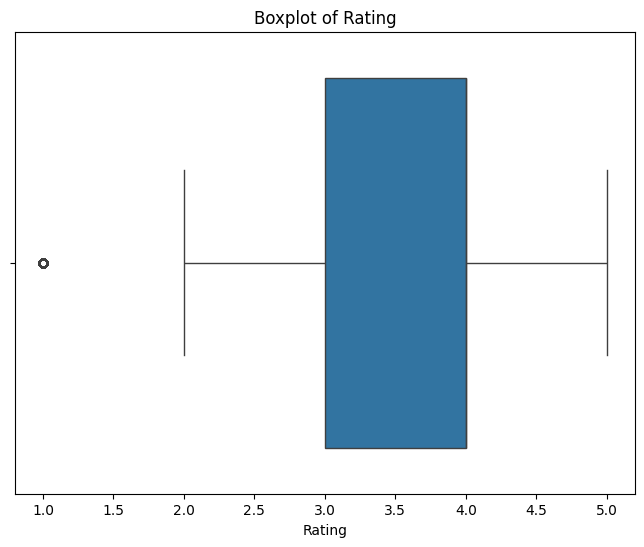

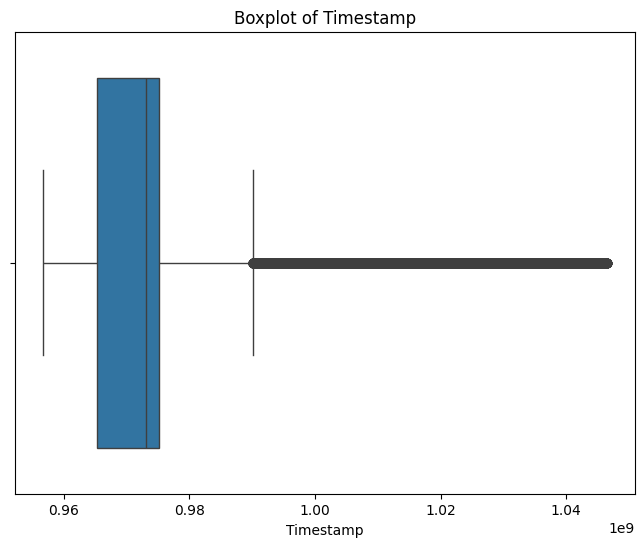

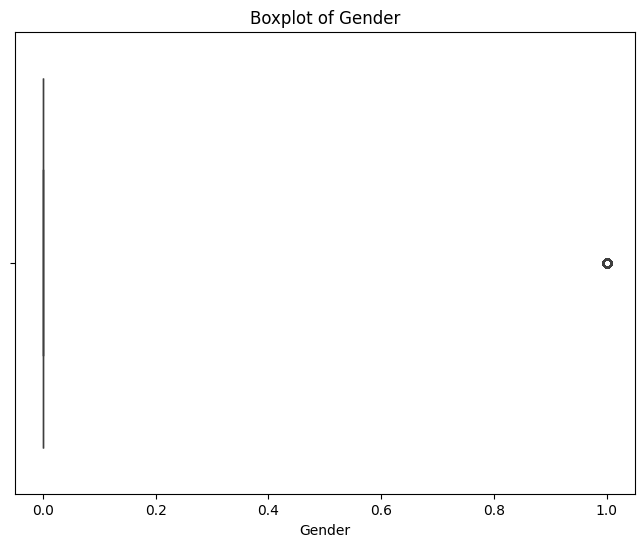

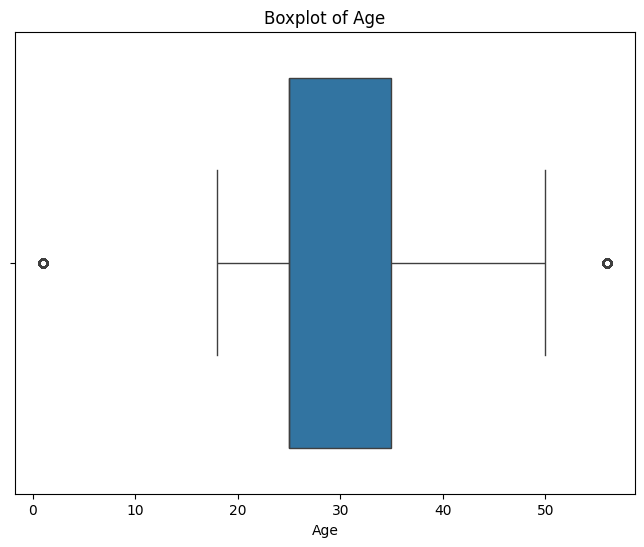

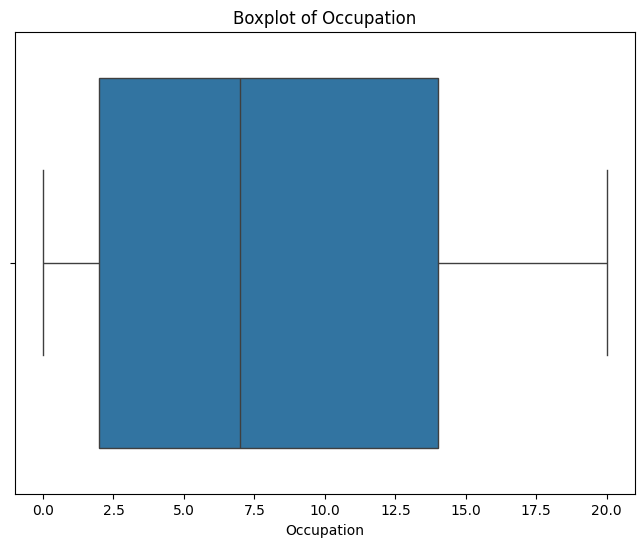

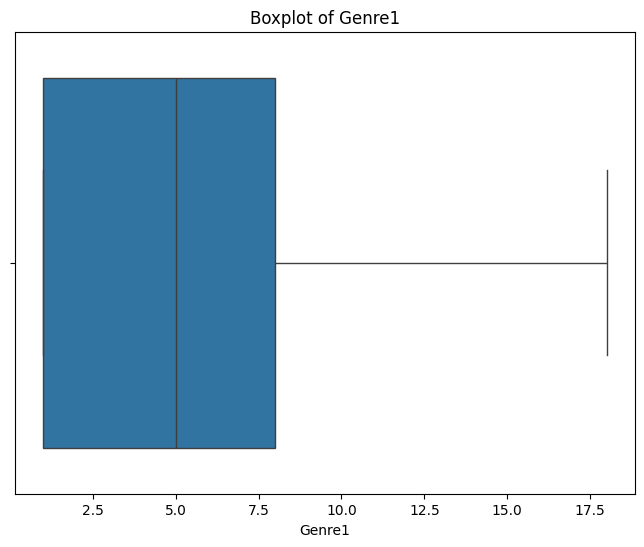

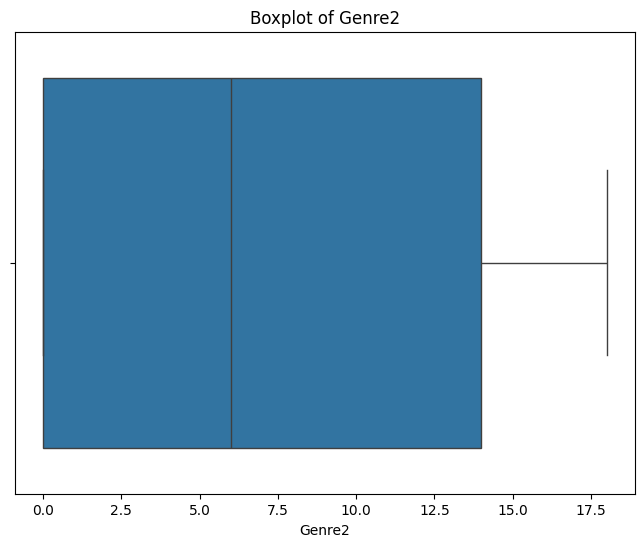

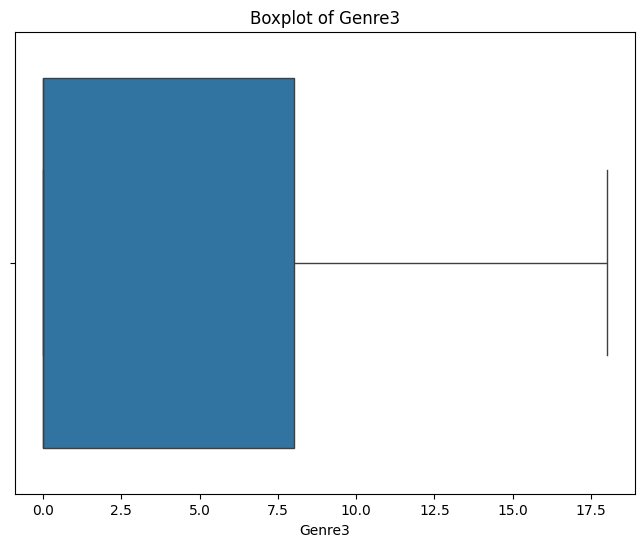

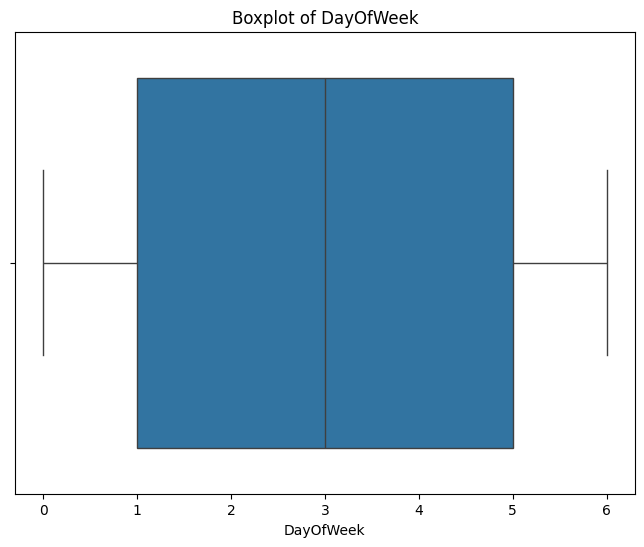

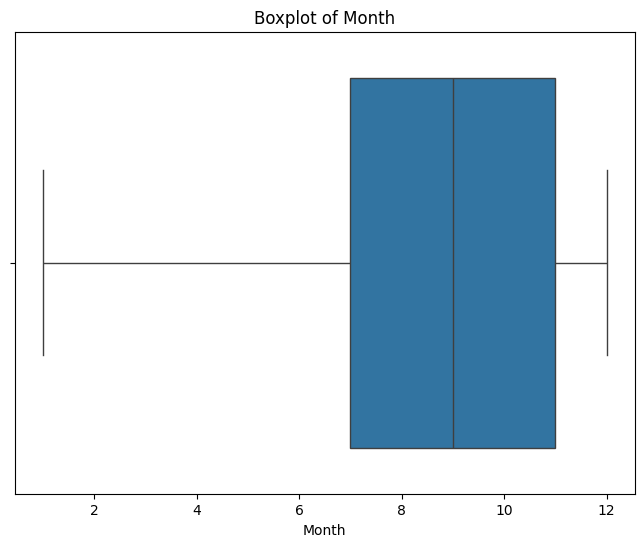

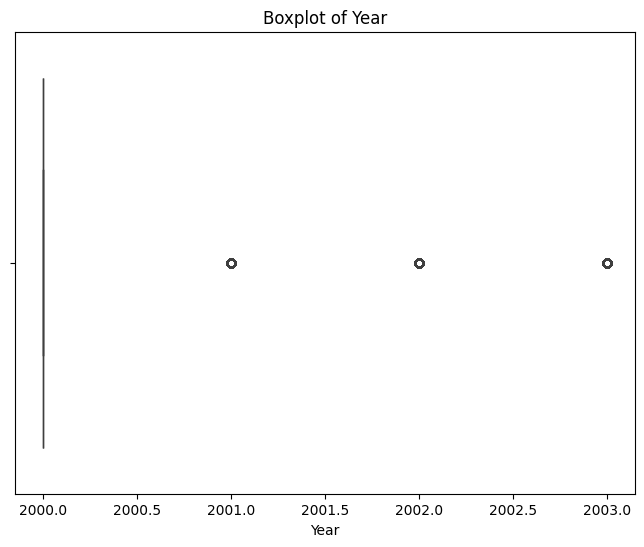

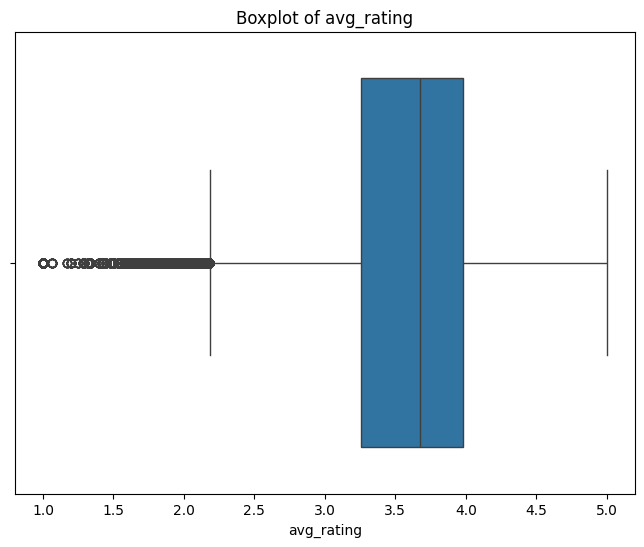

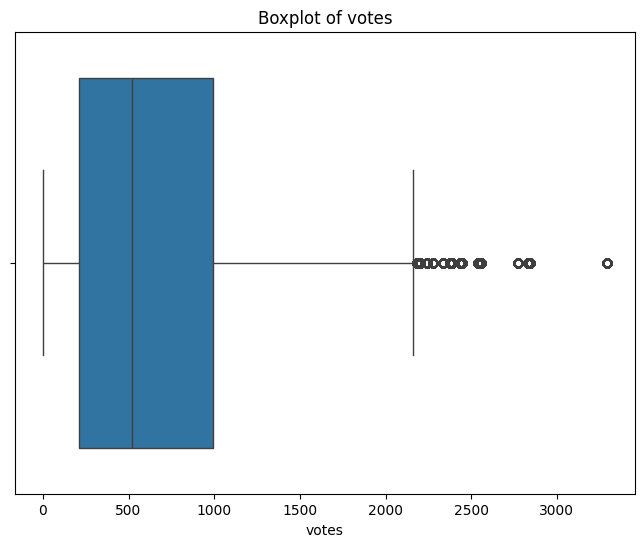

In [146]:
# prompt: boxplot ตัวแปรแต่ละตัว

import matplotlib.pyplot as plt
import seaborn as sns

# เลือกเฉพาะคอลัมน์ที่เป็นตัวเลข
numerical_cols = merged_df.select_dtypes(include=['number']).columns

# สร้าง boxplot สำหรับแต่ละคอลัมน์
for col in numerical_cols:
    plt.figure(figsize=(8, 6))  # ปรับขนาดกราฟตามต้องการ
    sns.boxplot(x=merged_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


เพศ

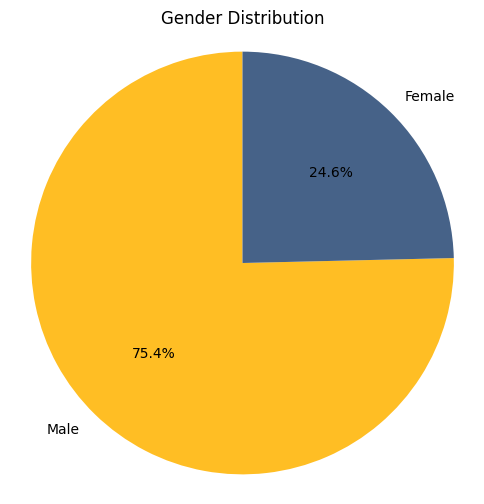

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt
mycolors = {'#ffbe24','#466288','#de4a48'}
# Assuming 'Gender' column has values 0 and 1 (or 'M' and 'F')
gender_counts = merged_df['Gender'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
plt.pie(gender_counts, labels=['Male', 'Female'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette(mycolors))
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


#### Data visualization

#### Target variable analysis

- Target variable analysis: examine how each feature correlates with or impacts the target/interested variable


## Data Modeling

In [59]:
# Partition data

# Handle imbalance data (optional)

# Model selection and tuning

# Evaluate models


## Decision Tree
ของทั้ง 3  ข้อคาดการณ์

In [148]:
# -------------------------------------------------------------
# 📦 1. Import Libraries
# -------------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
from imblearn.over_sampling import SMOTE

# -------------------------------------------------------------
# 📥 2. Load Data
# -------------------------------------------------------------
# หากคุณมี DataFrame อยู่แล้วชื่อ merged_df ให้ข้ามส่วนนี้ได้เลย
# merged_df = pd.read_csv('merged.csv')

# ตรวจดูข้อมูล
print(merged_df.info())
print(merged_df.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998080 entries, 0 to 998079
Data columns (total 20 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   UserID      998080 non-null  object        
 1   MovieID     998080 non-null  object        
 2   Rating      998080 non-null  int64         
 3   Timestamp   998080 non-null  int64         
 4   Gender      998080 non-null  int64         
 5   Age         998080 non-null  int64         
 6   Occupation  998080 non-null  int64         
 7   Zip-code    998080 non-null  object        
 8   Title       998080 non-null  object        
 9   Datetime    998080 non-null  datetime64[ns]
 10  Genre1      998080 non-null  int64         
 11  Genre2      998080 non-null  int64         
 12  Genre3      998080 non-null  int64         
 13  DayOfWeek   998080 non-null  int32         
 14  Month       998080 non-null  int32         
 15  Year        998080 non-null  int32         
 16  Ho

In [160]:
# -------------------------------------------------------------
# 🧹 3. Clean Data
# -------------------------------------------------------------
merged_df = merged_df.drop_duplicates()
merged_df = merged_df.dropna(subset=['Rating'])


In [161]:
# สร้าง label สำหรับโมเดล
merged_df['Like'] = (merged_df['Rating'] >= 4).astype(int)


In [162]:
# Display the distribution of the 'Like' label
print("Distribution of 'Like' label (1: Liked, 0: Disliked):")
print(merged_df['Like'].value_counts())
print("\nPercentage distribution of 'Like' label:")
print(merged_df['Like'].value_counts(normalize=True) * 100)

Distribution of 'Like' label (1: Liked, 0: Disliked):
Like
1    575281
0    424928
Name: count, dtype: int64

Percentage distribution of 'Like' label:
Like
1    57.516079
0    42.483921
Name: proportion, dtype: float64


In [150]:
# -------------------------------------------------------------
# 📊 4. สถิติพื้นฐาน
# -------------------------------------------------------------
print("จำนวนผู้ใช้ทั้งหมด:", merged_df['UserID'].nunique())
print("จำนวนภาพยนตร์ทั้งหมด:", merged_df['MovieID'].nunique())
print("จำนวนการให้คะแนนทั้งหมด:", len(merged_df))
print("ค่าเฉลี่ยคะแนน:", merged_df['Rating'].mean())


จำนวนผู้ใช้ทั้งหมด: 6039
จำนวนภาพยนตร์ทั้งหมด: 3705
จำนวนการให้คะแนนทั้งหมด: 998080
ค่าเฉลี่ยคะแนน: 3.580357285989099


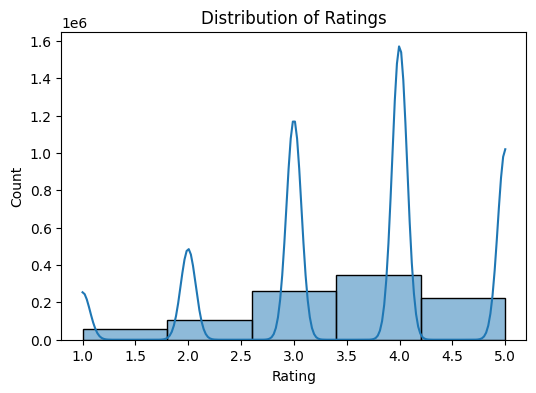

In [152]:
# -------------------------------------------------------------
# 📈 5. Visualization
# -------------------------------------------------------------

# การกระจายคะแนน (Histogram)
plt.figure(figsize=(6,4))
sns.histplot(merged_df['Rating'], bins=5, kde=True)
plt.title("Distribution of Ratings")
plt.show()




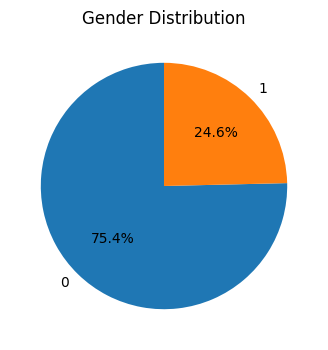

In [153]:
# สัดส่วนเพศ (Pie Chart)
plt.figure(figsize=(4,4))
merged_df['Gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Gender Distribution")
plt.ylabel("")
plt.show()


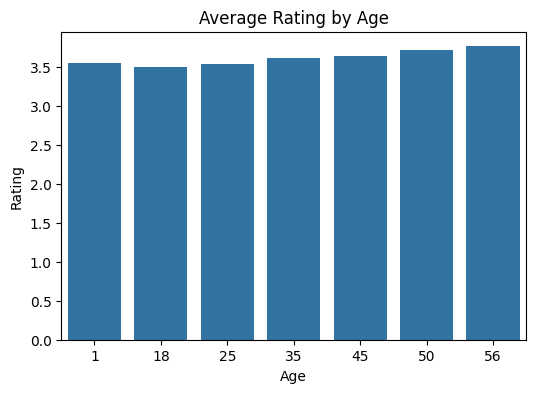

In [154]:
# คะแนนเฉลี่ยตามช่วงอายุ
age_rating = merged_df.groupby('Age')['Rating'].mean().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(x='Age', y='Rating', data=age_rating)
plt.title("Average Rating by Age")
plt.show()



/tmp/ipython-input-1049622480.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Genre1', y='Rating', data=genre_rating, palette='viridis')


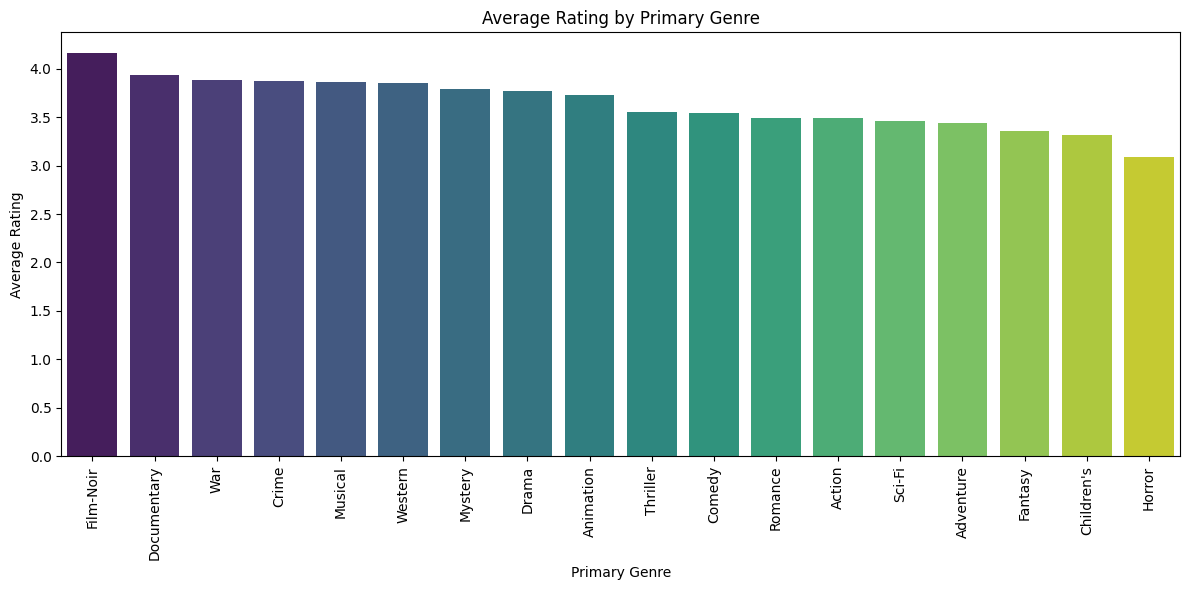

In [155]:
# คะแนนเฉลี่ยต่อแนวหนัง
# Use df as it's intended for use in subsequent tasks
# Ensure Genre1 exists in df
if 'Genre1' not in df.columns and 'Genres' in df.columns:
    # Split genres and create Genre1 if it doesn't exist
    df['Genre1'] = df['Genres'].str.split('|', expand=True)[0]
    # Map string genre names to numerical codes if needed for other parts, but for this plot, we need names
    # We will map numerical codes back to names for the plot labels

genre_rating = df.groupby('Genre1')['Rating'].mean().sort_values(ascending=False).reset_index()


plt.figure(figsize=(12, 6)) # Increased figure size for better readability
sns.barplot(x='Genre1', y='Rating', data=genre_rating, palette='viridis')
plt.title("Average Rating by Primary Genre")
plt.xticks(rotation=90) # Rotate labels for better fit
plt.ylabel("Average Rating")
plt.xlabel("Primary Genre")
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

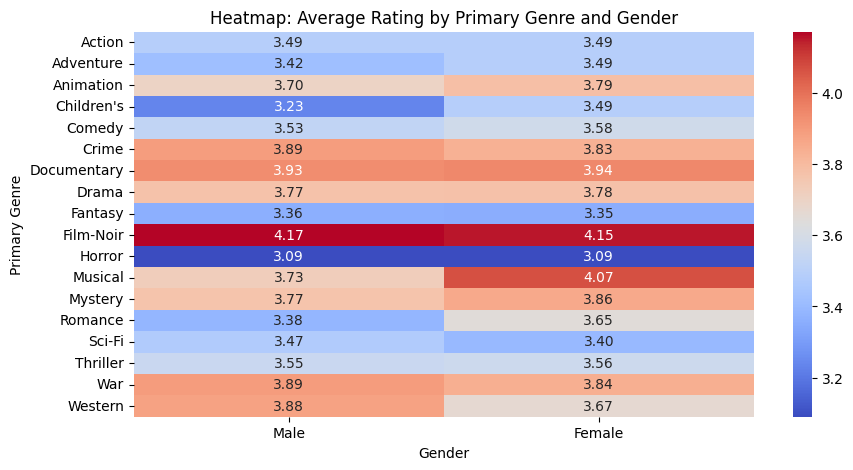

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Re-run essential data preparation steps within this cell ---
# This is to ensure the necessary columns like 'Genre1' are available for plotting

# Load data (assuming file paths are correct)
try:
    ratings_cols = ['UserID', 'MovieID', 'Rating', 'Timestamp']
    ratings_df = pd.read_csv('/content/drive/MyDrive/DW part2/Thaibann/ratings.dat', sep='::', engine='python', names=ratings_cols)

    users_cols = ['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code']
    users_df = pd.read_csv('/content/drive/MyDrive/DW part2/Thaibann/users.dat', sep='::', engine='python', names=users_cols)
    # Map Gender to numerical
    users_df['Gender'] = users_df['Gender'].map({'M': 0, 'F': 1})


    movies_cols = ['MovieID', 'Title', 'Genres']
    movies_df = pd.read_csv('/content/drive/MyDrive/DW part2/Thaibann/movies.dat', sep='::', engine='python', names=movies_cols, encoding='latin-1')

    # Merge DataFrames
    merged_df = ratings_df.merge(users_df, on='UserID').merge(movies_df, on='MovieID')

    # Split Genres and convert to numerical (recreating logic from hdIolhX3_9yh)
    split_genres = merged_df['Genres'].str.split('|', expand=True)
    merged_df['Genre1'] = split_genres.iloc[:, 0].apply(lambda x: genre_to_number(x) if pd.notna(x) else 0)
    merged_df['Genre2'] = split_genres.iloc[:, 1].apply(lambda x: genre_to_number(x) if pd.notna(x) and split_genres.shape[1] > 1 else 0)
    merged_df['Genre3'] = split_genres.iloc[:, 2].apply(lambda x: genre_to_number(x) if pd.notna(x) and split_genres.shape[1] > 2 else 0)

    # Define genre_to_number function again if it's not in the global scope
    def genre_to_number(genre):
        if pd.isna(genre) or genre == '':
            return 0
        genre_dict = {
            "Action": 1, "Adventure": 2, "Animation": 3, "Children's": 4, "Comedy": 5,
            6: "Crime", 7: "Documentary", 8: "Drama", 9: "Fantasy", 10: "Film-Noir",
            11: "Horror", 12: "Musical", 13: "Mystery", 14: "Romance", 15: "Sci-Fi",
            16: "Thriller", 17: "War", 18: "Western",
        }
        # Handle both string names and potential numerical codes if they exist
        if isinstance(genre, str):
             return genre_dict.get(genre.strip(), 0)
        elif isinstance(genre, (int, float)):
             # If it's already a number, return it (assuming it's a valid genre code)
             return genre
        return 0


except FileNotFoundError as e:
    print(f"Error loading data: {e}. Please ensure the data files are in the correct location.")
    # Exit the cell execution or handle the error appropriately
    raise # Re-raise the exception to halt execution


# --- Plotting code (assuming merged_df now has 'Genre1' with numerical values and 'Gender' with numerical values) ---

# Heatmap Genre vs Rating
plt.figure(figsize=(10,5))

# Create pivot table
pivot_table = merged_df.pivot_table(index='Genre1', columns='Gender', values='Rating', aggfunc='mean')

# Map numerical index (Genre1) to genre names for better labels
genre_number_to_name = {
    1: "Action", 2: "Adventure", 3: "Animation", 4: "Children's", 5: "Comedy",
    6: "Crime", 7: "Documentary", 8: "Drama", 9: "Fantasy", 10: "Film-Noir",
    11: "Horror", 12: "Musical", 13: "Mystery", 14: "Romance", 15: "Sci-Fi",
    16: "Thriller", 17: "War", 18: "Western", 0: "Unknown/Other"
}
pivot_table.index = pivot_table.index.map(genre_number_to_name)
pivot_table.columns = pivot_table.columns.map({0: 'Male', 1: 'Female'}) # Map numerical Gender back to labels


sns.heatmap(pivot_table, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Heatmap: Average Rating by Primary Genre and Gender")
plt.xlabel("Gender")
plt.ylabel("Primary Genre")
plt.show()

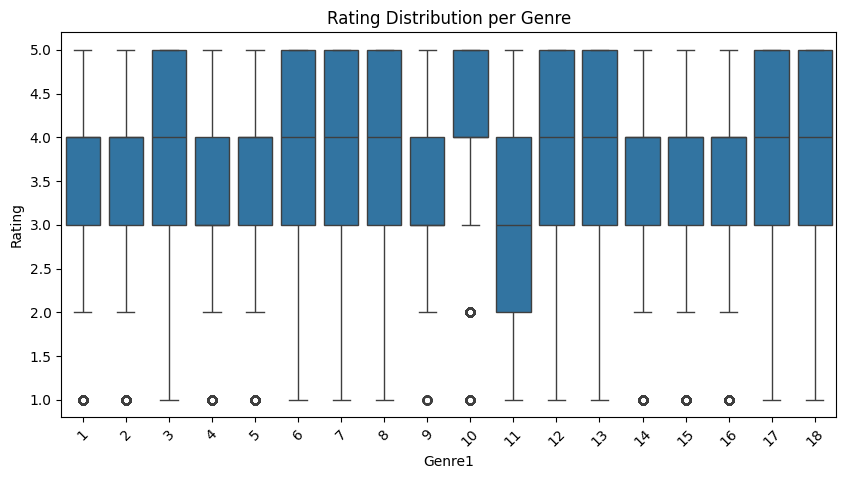

In [157]:
# Boxplot: Rating ต่อ Genre
plt.figure(figsize=(10,5))
sns.boxplot(x='Genre1', y='Rating', data=merged_df)
plt.xticks(rotation=45)
plt.title("Rating Distribution per Genre")
plt.show()


In [191]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
import pandas as pd

In [192]:
# เลือกเฉพาะคอลัมน์ที่ใช้
X = merged_df[['Gender', 'Age', 'Occupation', 'Genre1']]
y = merged_df['Like']

In [193]:
y

,Like
0,1
1,0
2,0
3,1
4,1
...,...
1000204,0
1000205,1
1000206,1
1000207,1


In [194]:
# One-hot encoding
X = pd.get_dummies(X, columns=['Gender', 'Occupation', 'Genre1'], drop_first=True)


In [195]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [196]:
# จัดการข้อมูลไม่สมดุล
sm = SMOTE(random_state=42)


In [197]:
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [198]:
# -------------------------------------------------------------
# ⚙️ มาตรฐานค่าตัวเลข (แนะนำสำหรับ Logistic Regression)
# -------------------------------------------------------------
scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)



In [199]:
# -------------------------------------------------------------
# 🤖 7. สร้างโมเดลทำนาย
# -------------------------------------------------------------
model = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)
model.fit(X_train_res_scaled, y_train_res)

LogisticRegression(max_iter=1000, random_state=42)

In [201]:
# -------------------------------------------------------------
# 📊 8. ประเมินโมเดล
# -------------------------------------------------------------
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))




Classification Report:
              precision    recall  f1-score   support

           0     0.4753    0.6214    0.5387     84986
           1     0.6382    0.4933    0.5565    115056

    accuracy                         0.5478    200042
   macro avg     0.5568    0.5574    0.5476    200042
weighted avg     0.5690    0.5478    0.5489    200042

ROC-AUC: 0.5809488980496245


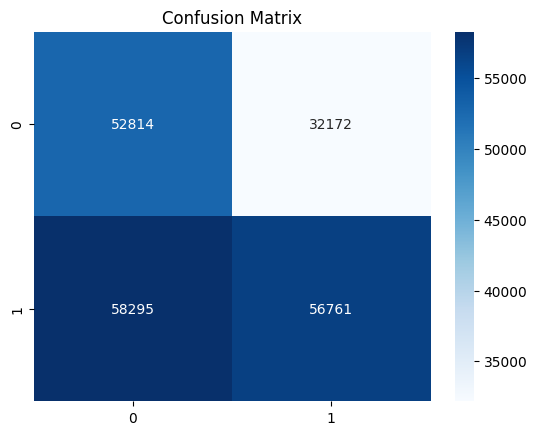

In [202]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


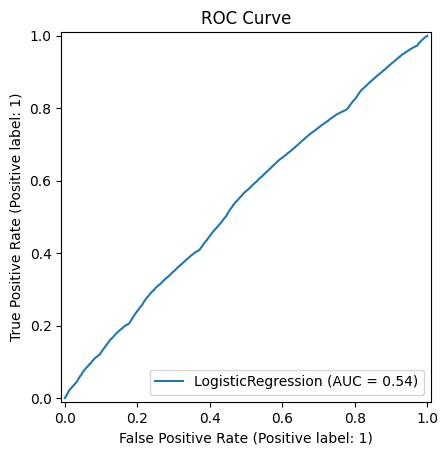

In [203]:
# ROC Curve
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("ROC Curve")
plt.show()

--------------------------------------------------------

#### สรุปผลที่ได้
...

-----------------
# เสร็จแล้ววววว 🥳

สิ่งที่ต้องแนบส่ง:
* Notebook File (ตัวอย่าง "filename.ipynb") หรือ Link to Google Colab / GitHub ซึ่งมีผลลัพธ์จากการรันโค้ดแสดงทั้งหมด
* Slides สำหรับการนำเสนอ **10** นาที ซึ่งประกอบไปด้วย
    * Data Description: อธิบายข้อมูลที่ใช้
    * Data Preparation: การเตรียมข้อมูลก่อนวิเคราะห์
    * Motivation: ปัญหาหรือคำถามที่ตั้ง ทำไมถึงสนใจที่จะทำงานในเรื่องนี้
    * Communicating Results (with figure, table, etc.): ผลที่ได้จากการศึกษา โดยระบุแนวทางที่ใช้ที่ทำให้เกิดผลลัพธ์ดังกล่าวด้วย
        โดยไม่ต้องนำเสนอ source code ผลประกอบด้วย 2 ส่วนสำคัญ จาก
        * Conjectures >= 3 ข้อ
        * Machine learning models
    * Conclusion: สรุปผลที่ได้จากการวิเคราะห์ข้อมูล
** Note: แต่ละกลุ่มส่งแต่ละไฟล์ครั้งเดียว **
---------------------

---

## **Data**

---

### **รายละเอียดข้อมูล MovieLens 1M**

### 1️⃣ **ไฟล์ ratings.dat**

**โครงสร้างข้อมูล:**

```
UserID::MovieID::Rating::Timestamp
```

**รายละเอียด:**

* UserID: หมายเลขผู้ใช้ (1 ถึง 6040)
* MovieID: หมายเลขภาพยนตร์ (1 ถึง 3952)
* Rating: คะแนนจาก 1 ถึง 5 ดาว (เต็มดาวเท่านั้น)
* Timestamp: เวลาการให้คะแนน (หน่วยเป็นวินาที ตั้งแต่ epoch time)
* ผู้ใช้ทุกคนให้คะแนนอย่างน้อย **20 เรื่อง**

---

### 2️⃣ **ไฟล์ users.dat**

**โครงสร้างข้อมูล:**

```
UserID::Gender::Age::Occupation::Zip-code
```

**รายละเอียด:**

* Gender:

  * “M” = ผู้ชาย
  * “F” = ผู้หญิง
* Age (ช่วงอายุ):

  ```
  1: ต่ำกว่า 18 ปี
  18: 18–24 ปี
  25: 25–34 ปี
  35: 35–44 ปี
  45: 45–49 ปี
  50: 50–55 ปี
  56: 56 ปีขึ้นไป
  ```
* Occupation (อาชีพ):

  ```
  0: อื่น ๆ / ไม่ระบุ
  1: ครู / นักวิชาการ
  2: ศิลปิน
  3: ธุรการ / งานสำนักงาน
  4: นักศึกษามหาวิทยาลัย / บัณฑิตศึกษา
  5: บริการลูกค้า
  6: แพทย์ / สาธารณสุข
  7: ผู้บริหาร / ผู้จัดการ
  8: เกษตรกร
  9: แม่บ้าน
  10: นักเรียนมัธยม
  11: ทนายความ
  12: โปรแกรมเมอร์
  13: ผู้เกษียณอายุ
  14: ฝ่ายขาย / การตลาด
  15: นักวิทยาศาสตร์
  16: อาชีพอิสระ
  17: ช่างเทคนิค / วิศวกร
  18: ช่างฝีมือ / ช่างไม้
  19: ว่างงาน
  20: นักเขียน
  ```
* ข้อมูลประชากรทั้งหมดมาจากการกรอกโดยสมัครใจของผู้ใช้
  และ **ไม่ได้ตรวจสอบความถูกต้อง**

---

### 3️⃣ **ไฟล์ movies.dat**

**โครงสร้างข้อมูล:**

```
MovieID::Title::Genres
```

**รายละเอียด:**

* Title: ชื่อภาพยนตร์ (รวมปีที่ออกฉายตาม IMDb)
* Genres: ประเภทของภาพยนตร์ (คั่นด้วย “|”)
  เช่น `Action|Comedy|Romance`
* หมวดหมู่ภาพยนตร์ที่ใช้มีดังนี้:

  ```
  Action, Adventure, Animation, Children's, Comedy, Crime,
  Documentary, Drama, Fantasy, Film-Noir, Horror, Musical,
  Mystery, Romance, Sci-Fi, Thriller, War, Western
  ```
* หมายเลขภาพยนตร์บางรายการอาจเป็นข้อมูลซ้ำหรือข้อมูลทดสอบ
* รายการภาพยนตร์ส่วนใหญ่ถูกป้อนด้วยมือ อาจมีข้อผิดพลาดเล็กน้อย

#### ปัญหา/คำถามที่สนใจคืออะไร
...

#### ปัญหา/คำถามที่สนใจมีความสำคัญอย่างไร?
...

#### ข้อคาดการณ์ของท่านจะนำไปสู่การแก้ไขปัญหาหรือตอบคำถาม
1. ...
2. ...
3. ...
4. (Optional)
5. (Optional)